In [27]:
import altair as alt
import numpy as np
import pandas as pd
from sklearn import datasets

In [14]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [10]:
display(
    iris.feature_names,
    iris.data.shape,
    iris.target_names,
    iris.target.shape,
)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(150, 4)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

(150,)

In [25]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names).assign(
    target=pd.Series(iris.target).map(dict(enumerate(iris.target_names)))
)
display(
    df_iris.info(),
    df_iris.head(),
    df_iris.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


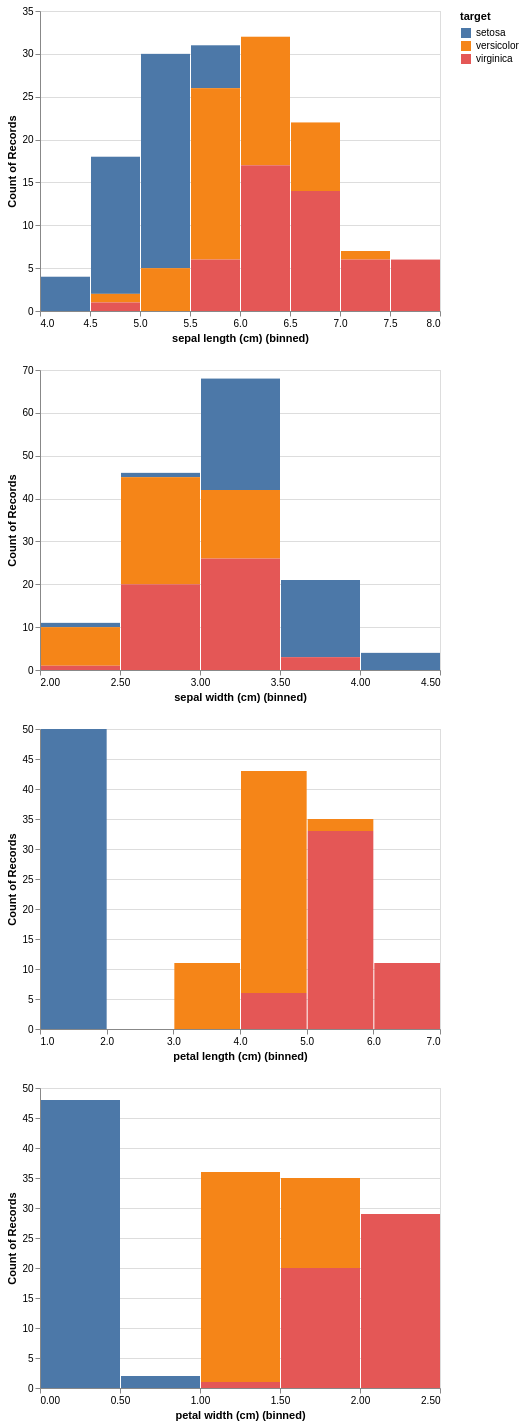

In [69]:
alt.Chart(df_iris).mark_bar().encode(
    x=alt.X(alt.repeat("row"), bin=True, type="quantitative"), y="count()", color="target:N"
).repeat(row=df_iris.columns.tolist()[:-1], background="white")

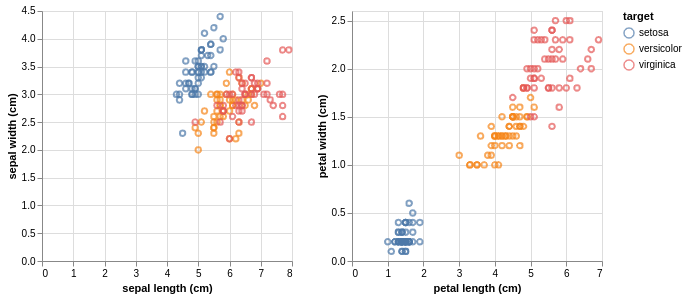

In [70]:
ch = alt.Chart(df_iris, height=250, width=250).mark_point()
(
    ch.encode(x="sepal length (cm):Q", y="sepal width (cm):Q", color="target:N")
    | ch.encode(x="petal length (cm):Q", y="petal width (cm):Q", color="target:N")
).properties(background="white")

In [77]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, random_state=1, test_size=.25)

In [78]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', random_state=1).fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      0.56      0.67        16
           2       0.50      0.78      0.61         9

    accuracy                           0.76        38
   macro avg       0.77      0.78      0.76        38
weighted avg       0.81      0.76      0.77        38



In [83]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr', random_state=1, solver='liblinear').fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.06      0.12        16
           2       0.39      1.00      0.56         9

    accuracy                           0.61        38
   macro avg       0.77      0.69      0.55        38
weighted avg       0.83      0.61      0.51        38



In [92]:
from sklearn.model_selection import cross_val_predict, cross_val_score
clf = SVC(kernel='linear', random_state=7)
cross_val_score(clf, X_train, y_train, cv=4)

array([0.8       , 0.89285714, 0.81481481, 0.77777778])

In [93]:
clf = LogisticRegression(multi_class='ovr', random_state=7, solver='liblinear')
cross_val_score(clf, X_train, y_train, cv=4)

array([0.7       , 0.67857143, 0.62962963, 0.66666667])

In [100]:
X_train_s, _1, y_train_s, _2 = train_test_split(iris.data[:, :2], iris.target, random_state=7, stratify=iris.target)
cross_val_score(SVC(kernel='linear', random_state=7), X_train_s, y_train_s, cv=4)

array([0.83333333, 0.67857143, 0.7037037 , 0.92592593])

In [109]:
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, random_state=0, stratify=iris.target)
display(
    stats.describe(cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv=10)),
    stats.describe(cross_val_score(KNeighborsClassifier(n_neighbors=5), X_train, y_train, cv=10))
)

DescribeResult(nobs=10, minmax=(0.6666666666666666, 1.0), mean=0.7983333333333333, variance=0.009163580246913583, skewness=0.8666774522190215, kurtosis=0.07522823980729942)

DescribeResult(nobs=10, minmax=(0.75, 0.9), mean=0.8066666666666666, variance=0.003475994513031551, skewness=0.3850934438993509, kurtosis=-1.3135930664198163)

In [147]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(iris.data[iris.target<2], iris.target[iris.target<2], random_state=7, stratify=iris.target[iris.target<2], test_size=.25)
svr_to_class_scorer = make_scorer(lambda y_test, y_pred: accuracy_score(y_test, np.rint(y_pred).astype(np.int)), greater_is_better=True)

In [153]:
cross_val_score(SVR(kernel='linear'), X_train, y_train, cv=4, scoring=svr_to_class_scorer)

array([1., 1., 1., 1.])